<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r2-balanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-normal-n-0-3-r2.csv?token=AKVFSOGR6KDKUED4JXHRL2C6ZLIWC')
print(df.shape)
df

(50621, 30)


,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,15,2,4,1,1,4,3,9,0,0,23,7,1,4,2,0.500000,12,2,1,2,2,4,8,1,4,4,3,27,9,1
1,80,4,2,1,1,4,3,9,3,3,24,8,3,5,1,0.200000,8,1,2,2,2,4,8,1,4,12,3,27,9,1
2,206,1,2,1,1,4,3,9,3,3,22,6,5,2,1,0.500000,8,1,1,1,1,1,2,1,4,20,3,27,9,1
3,220,1,4,1,1,4,3,9,0,0,22,6,6,3,2,0.666667,12,1,1,1,1,1,4,1,4,24,3,27,9,1
4,346,2,4,1,1,4,3,9,0,0,23,7,8,4,2,0.500000,12,2,1,2,2,4,8,1,4,32,3,27,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50616,3268946,1,2,5,2,2,3,9,3,3,22,6,20044,2,1,0.500000,15,5,2,6,10,60,2,10,20,400880,15,27,45,1
50617,3268953,1,2,5,3,2,3,9,3,3,22,6,20044,2,1,0.500000,22,4,3,6,12,72,2,15,30,601320,15,27,45,1
50618,3268960,1,2,5,4,2,3,9,3,3,22,6,20044,2,1,0.500000,29,3,4,6,12,72,2,20,40,801760,15,27,45,1
50619,3268967,1,2,5,5,3,3,9,3,3,22,6,20044,2,1,0.500000,36,2,5,6,10,60,2,25,75,1503300,15,27,45,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-malicious-n-0-3-m-1-r2.csv?token=AKVFSODJUY5YYCMB5N2C6ZK6ZLIX4', nrows=40000)
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-malicious-n-0-3-m-6-r2.csv?token=AKVFSOCRWTOI7IDRU5AMUPS6ZLIX6', nrows=40000)
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-malicious-n-0-3-m-9-r2.csv?token=AKVFSOFVO6PXVC3TNNYRHL26ZLIYC', nrows=40000)
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-malicious-n-0-3-m-14-r2.csv?token=AKVFSOHWYI3635AMYIB2GGK6ZLIYE', nrows=40000)

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-normal-n-0-5-r2.csv?token=AKVFSOE6ZSYKVK6GF3DZYVC6ZLI26')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-normal-n-0-12-r2.csv?token=AKVFSOAW4EWZXTMHA5WHMFS6ZLI3C')
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-normal-n-0-15-r2.csv?token=AKVFSOBZNPNSP6MEZSGHA7K6ZLI3E')

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)

(40000, 30)
(40000, 30)
(40000, 30)
(40000, 30)
(30994, 30)
(30754, 30)
(31029, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,1,1,23,7,2,3,1,0.333333,8,3,1,3,3,9,8,1,4,8,3,27,9,0
1,15,2,4,1,1,4,3,9,0,0,23,7,1,4,2,0.500000,12,2,1,2,2,4,8,1,4,4,3,27,9,1
2,15,2,4,1,1,4,3,9,0,0,23,7,1,4,2,0.500000,12,2,1,2,2,4,8,1,4,4,3,27,9,0
3,15,2,4,1,1,4,3,10,0,0,23,7,1,4,2,0.500000,12,2,2,3,4,12,8,1,4,4,3,30,9,0
4,15,2,4,1,1,4,3,9,0,0,23,7,1,4,2,0.500000,12,1,1,1,1,1,8,1,4,4,3,27,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303393,3275310,4,0,6,4,2,3,12,18,2,20,4,20057,3,0,0.000000,25,1,1,1,1,1,0,24,48,962736,18,36,54,1
303394,3275317,4,0,6,5,3,3,12,18,2,20,4,20057,3,0,0.000000,32,1,1,1,1,1,0,30,90,1805130,18,36,54,1
303395,3275318,4,0,2,1,4,3,9,18,2,20,4,20058,3,0,0.000000,32,1,1,1,1,1,0,2,8,160464,6,27,18,1
303396,3275319,2,0,7,1,4,3,10,18,2,15,15,20057,4,0,0.000000,5,1,1,1,1,1,0,7,28,561596,21,30,63,1


In [0]:
df.shape

(303398, 30)

Test Data

In [0]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-malicious-n-0-3-m-2-r2.csv?token=AKVFSOFKYA3ZOBL2ZKZ66WS6ZLJAG', nrows=30000)
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-malicious-n-0-3-m-5-r2.csv?token=AKVFSOGI5ZZHETZ4YUDPAQS6ZLJAK', nrows=30000)
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-malicious-n-0-3-m-10-r2.csv?token=AKVFSOG7GLTCY66ZKIZCDSK6ZLJAM', nrows=30000)
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-malicious-n-0-3-m-12-r2.csv?token=AKVFSOBRVD7HBAWY3JHCBPK6ZLJAQ', nrows=30000)
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-malicious-n-0-3-m-13-r2.csv?token=AKVFSOH6YSV46UJ33SIGKEK6ZLJAU', nrows=30000)
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-malicious-n-0-3-m-15-r2.csv?token=AKVFSOFYUTTCLRT3JW3HWWS6ZLJAY', nrows=30000)

df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r2/2-fft-normal-n-0-10-r2.csv?token=AKVFSOEOETP7LO2FHVVAAPC6ZLJGY', nrows=30000)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df14.shape)

(30000, 30)
(30000, 30)
(30000, 30)
(30000, 30)
(30000, 30)
(30000, 30)
(30000, 30)


In [0]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,2,2,23,7,2,2,0,0.0,4,8,1,8,8,64,0,1,4,8,3,27,9,0
1,15,2,4,1,1,4,3,9,0,0,23,7,1,4,2,0.5,12,7,2,8,14,112,8,1,4,4,3,27,9,0
2,80,0,1,4,1,1,5,17,23,7,2,2,2,2,2,1.0,12,6,3,8,18,144,0,4,4,8,20,85,100,0
3,80,4,2,1,1,4,3,9,3,3,24,8,4,5,1,0.2,8,5,4,8,20,160,8,1,4,16,3,27,9,0
4,81,0,1,4,2,2,5,17,23,7,2,2,2,2,2,1.0,13,4,5,8,20,160,0,8,16,32,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,727070,4,0,6,4,2,3,11,18,2,20,4,6993,3,0,0.0,25,4,10,13,40,520,0,24,48,335664,18,33,54,0
29996,727077,4,0,6,5,3,3,11,18,2,20,4,6993,3,0,0.0,32,3,11,13,33,429,0,30,90,629370,18,33,54,0
29997,727078,4,0,2,1,4,3,12,18,2,20,4,6994,3,0,0.0,32,2,12,13,24,312,0,2,8,55952,6,36,18,0
29998,727079,0,0,7,1,4,3,9,18,2,2,2,6993,0,0,0.0,5,1,13,13,13,169,0,7,28,195804,21,27,63,0


In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.495109,0.215689,0.019160,-0.028362,NaN,0.267237,-0.011219,0.214288,-0.671991,-0.793069,-0.166738,-0.065453,0.077811,0.007651,0.015652,0.009361,0.453137,0.107686,0.090058,0.056768,0.215689,0.267237,0.215689,-0.064659
inport,-0.495109,1.000000,-0.172243,0.045478,-0.067360,NaN,-0.431551,0.028848,0.241239,0.608422,0.468590,0.225019,-0.014053,-0.138464,-0.094474,-0.098351,-0.090070,0.430446,-0.040713,-0.049577,-0.020715,-0.172243,-0.431551,-0.172243,0.079582
cache_coherence_type,0.215689,-0.172243,1.000000,0.375259,-0.555610,NaN,-0.165428,0.011407,-0.039791,-0.244059,-0.230417,-0.492604,0.047413,-0.035587,0.007327,0.023862,0.022486,-0.001897,0.548173,0.441659,0.320339,1.000000,-0.165428,1.000000,0.006600
flit_id,0.019160,0.045478,0.375259,1.000000,-0.071494,NaN,-0.250347,0.021132,0.045612,-0.002814,-0.011594,0.528746,0.028004,0.024223,0.032352,0.049507,0.030499,0.037171,0.974383,0.935100,0.700892,0.375259,-0.250347,0.375259,0.004022
flit_type,-0.028362,-0.067360,-0.555610,-0.071494,1.000000,NaN,0.370678,-0.031344,-0.067524,0.004165,0.017164,0.522736,-0.111070,0.138898,0.017231,-0.006337,-0.005812,-0.055050,-0.168411,0.091298,0.062996,-0.555610,0.370678,-0.555610,-0.005921
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.267237,-0.431551,-0.165428,-0.250347,0.370678,NaN,1.000000,-0.017561,-0.136987,-0.415759,-0.362845,0.009360,-0.016209,0.176503,0.099289,0.104645,0.101105,-0.295927,-0.225814,-0.139743,-0.116874,-0.165428,1.000000,-0.165428,0.007738
traversal_id,-0.011219,0.028848,0.011407,0.021132,-0.031344,NaN,-0.017561,1.000000,0.060928,0.029001,-0.007582,0.033637,-0.135599,-0.135649,-0.168025,-0.126977,-0.097462,0.016520,0.015336,0.009507,0.521276,0.011407,-0.017561,0.011407,0.058186
hop_count,0.214288,0.241239,-0.039791,0.045612,-0.067524,NaN,-0.136987,0.060928,1.000000,0.231913,-0.388722,0.119956,-0.118651,-0.064483,-0.113444,-0.103845,-0.097406,0.490708,0.034305,0.010121,0.037651,-0.039791,-0.136987,-0.039791,0.117931
current_hop,-0.671991,0.608422,-0.244059,-0.002814,0.004165,NaN,-0.415759,0.029001,0.231913,1.000000,0.741910,0.279644,-0.034453,-0.157228,-0.118733,-0.113179,-0.093837,0.098940,-0.094626,-0.088467,-0.047827,-0.244059,-0.415759,-0.244059,0.163100


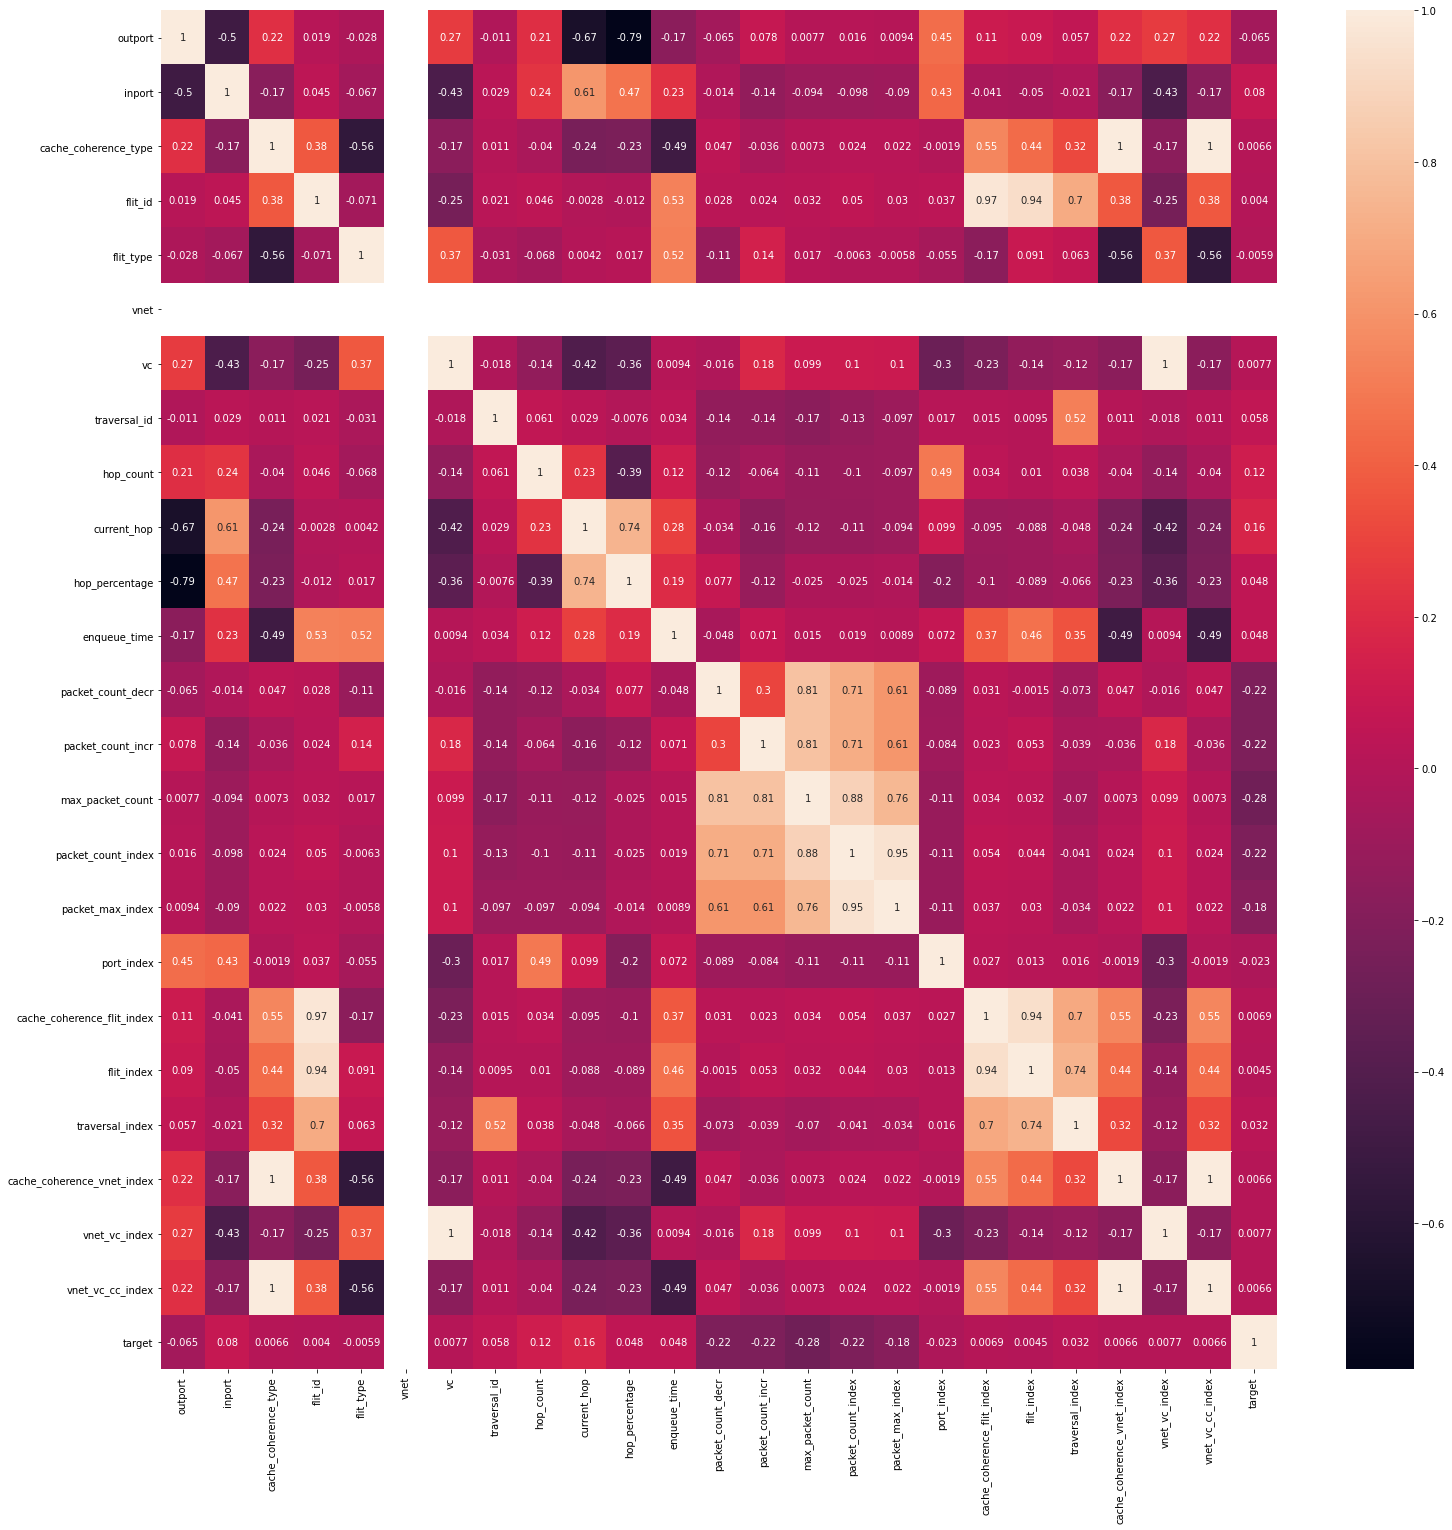

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,4,1,1,4,3,9,2,3,1,0.333333,8,3,1,3,3,9,8,1,4,8,3,27,9
1,2,4,1,1,4,3,9,1,4,2,0.500000,12,2,1,2,2,4,8,1,4,4,3,27,9
2,2,4,1,1,4,3,9,1,4,2,0.500000,12,2,1,2,2,4,8,1,4,4,3,27,9
3,2,4,1,1,4,3,10,1,4,2,0.500000,12,2,2,3,4,12,8,1,4,4,3,30,9
4,2,4,1,1,4,3,9,1,4,2,0.500000,12,1,1,1,1,1,8,1,4,4,3,27,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303393,4,0,6,4,2,3,12,20057,3,0,0.000000,25,1,1,1,1,1,0,24,48,962736,18,36,54
303394,4,0,6,5,3,3,12,20057,3,0,0.000000,32,1,1,1,1,1,0,30,90,1805130,18,36,54
303395,4,0,2,1,4,3,9,20058,3,0,0.000000,32,1,1,1,1,1,0,2,8,160464,6,27,18
303396,2,0,7,1,4,3,10,20057,4,0,0.000000,5,1,1,1,1,1,0,7,28,561596,21,30,63


In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.00005,0.4,0.2,0.333333,0.066667,0.055556,0.000000,0.055556,0.005556,0.000599,1.0,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000
1,0.5,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.00000,0.6,0.4,0.500000,0.133333,0.027778,0.000000,0.027778,0.002778,0.000225,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.5,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.00000,0.6,0.4,0.500000,0.133333,0.027778,0.000000,0.027778,0.002778,0.000225,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.5,1.00,0.000000,0.00,1.000000,0.0,0.333333,0.00000,0.6,0.4,0.500000,0.133333,0.027778,0.027778,0.055556,0.008333,0.000824,1.0,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000
4,0.5,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.00000,0.6,0.4,0.500000,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303393,1.0,0.00,0.833333,0.75,0.333333,0.0,1.000000,0.99995,0.4,0.0,0.000000,0.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.793103,0.511628,0.533332,0.833333,1.000000,0.833333
303394,1.0,0.00,0.833333,1.00,0.666667,0.0,1.000000,0.99995,0.4,0.0,0.000000,0.466667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.833333,1.000000,0.833333
303395,1.0,0.00,0.166667,0.00,1.000000,0.0,0.000000,1.00000,0.4,0.0,0.000000,0.466667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.034483,0.046512,0.088891,0.166667,0.000000,0.166667
303396,0.5,0.00,1.000000,0.00,1.000000,0.0,0.333333,0.99995,0.6,0.0,0.000000,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.206897,0.279070,0.311110,1.000000,0.333333,1.000000


In [0]:
train_X[train_X.duplicated()].shape

(15961, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [0]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,0.00,0.000000,0.00,1.000000,0.0,0.000,0.000143,0.333333,0.0,0.0,0.000000,0.233333,0.000000,0.233333,0.027451,0.007940,0.0,0.000000,0.000000,0.000006,0.000000,0.000000,0.000000
1,0.5,1.00,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.4,0.5,0.135593,0.200000,0.033333,0.233333,0.050980,0.013989,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.25,0.500000,0.00,0.000000,1.0,1.000,0.000143,0.333333,0.4,1.0,0.135593,0.166667,0.066667,0.233333,0.066667,0.018021,0.0,0.103448,0.000000,0.000006,0.944444,1.000000,1.000000
3,1.0,0.50,0.000000,0.00,1.000000,0.0,0.000,0.000429,0.833333,0.2,0.2,0.067797,0.133333,0.100000,0.233333,0.074510,0.020038,1.0,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000
4,0.0,0.25,0.500000,0.25,0.333333,1.0,1.000,0.000143,0.333333,0.4,1.0,0.152542,0.100000,0.133333,0.233333,0.074510,0.020038,0.0,0.241379,0.139535,0.000044,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.00,0.833333,0.75,0.333333,0.0,0.250,0.999857,0.500000,0.0,0.0,0.355932,0.100000,0.300000,0.400000,0.152941,0.065406,0.0,0.793103,0.511628,0.533330,0.833333,0.103448,0.494505
29996,1.0,0.00,0.833333,1.00,0.666667,0.0,0.250,0.999857,0.500000,0.0,0.0,0.474576,0.066667,0.333333,0.400000,0.125490,0.053938,0.0,1.000000,1.000000,1.000000,0.833333,0.103448,0.494505
29997,1.0,0.00,0.166667,0.00,1.000000,0.0,0.375,1.000000,0.500000,0.0,0.0,0.474576,0.033333,0.366667,0.400000,0.090196,0.039193,0.0,0.034483,0.046512,0.088896,0.166667,0.155172,0.098901
29998,0.0,0.00,1.000000,0.00,1.000000,0.0,0.000,0.999857,0.000000,0.0,0.0,0.016949,0.000000,0.400000,0.400000,0.047059,0.021172,0.0,0.206897,0.279070,0.311107,1.000000,0.000000,0.593407


In [0]:
test_X[test_X.duplicated()].shape

(0, 24)

In [0]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.0,0.000000,0.6,0.666667,0.500000,0.133333,0.038462,0.000000,0.038462,0.005128,0.000567,1.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.0,0.000211,0.8,0.333333,0.200000,0.066667,0.000000,0.038462,0.038462,0.005128,0.000567,1.00,0.000000,0.000000,0.000009,0.000000,0.0,0.000000
2,0.25,0.5,0.000000,0.00,1.000000,0.0,0.0,0.000422,0.2,0.333333,0.500000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000019,0.000000,0.0,0.000000
3,0.25,1.0,0.000000,0.00,1.000000,0.0,0.0,0.000563,0.4,0.666667,0.666667,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.50,0.000000,0.000000,0.000025,0.000000,0.0,0.000000
4,0.50,1.0,0.000000,0.00,1.000000,0.0,0.0,0.000774,0.6,0.666667,0.500000,0.133333,0.038462,0.000000,0.038462,0.005128,0.000567,1.00,0.000000,0.000000,0.000034,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.25,1.0,0.666667,0.00,0.000000,0.0,0.0,1.000000,0.8,0.666667,0.400000,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.50,0.137931,0.011628,0.055596,0.666667,0.0,0.666667
29996,0.25,1.0,0.666667,0.25,0.333333,0.0,0.0,1.000000,0.8,0.666667,0.400000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.50,0.310345,0.186047,0.222392,0.666667,0.0,0.666667
29997,0.25,1.0,0.666667,0.50,0.333333,0.0,0.0,1.000000,0.8,0.666667,0.400000,0.366667,0.346154,0.000000,0.346154,0.046154,0.018711,0.50,0.482759,0.302326,0.333589,0.666667,0.0,0.666667
29998,0.25,1.0,0.666667,0.75,0.333333,0.0,0.0,1.000000,0.8,0.666667,0.400000,0.483333,0.307692,0.038462,0.346154,0.087179,0.033831,0.50,0.655172,0.418605,0.444787,0.666667,0.0,0.666667


In [0]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.0,0.000000,0.6,0.666667,0.500000,0.133333,0.038462,0.000000,0.038462,0.005128,0.000567,1.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.0,0.000216,0.8,0.333333,0.200000,0.066667,0.000000,0.038462,0.038462,0.005128,0.000567,1.00,0.000000,0.000000,0.000010,0.000000,0.0,0.000000
2,0.25,0.5,0.000000,0.00,1.000000,0.0,0.0,0.000431,0.2,0.333333,0.500000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000019,0.000000,0.0,0.000000
3,0.25,1.0,0.000000,0.00,1.000000,0.0,0.0,0.000575,0.4,0.666667,0.666667,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.50,0.000000,0.000000,0.000026,0.000000,0.0,0.000000
4,0.50,1.0,0.000000,0.00,1.000000,0.0,0.0,0.000791,0.6,0.666667,0.500000,0.133333,0.038462,0.000000,0.038462,0.005128,0.000567,1.00,0.000000,0.000000,0.000035,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.00,0.0,0.833333,0.25,0.333333,0.0,1.0,0.999856,0.4,0.000000,0.000000,0.116667,0.192308,0.307692,0.500000,0.271795,0.142695,0.00,0.379310,0.232558,0.266664,0.833333,1.0,0.833333
29996,1.00,0.0,0.833333,0.50,0.333333,0.0,1.0,0.999856,0.4,0.000000,0.000000,0.233333,0.153846,0.346154,0.500000,0.251282,0.132111,0.00,0.586207,0.372093,0.399998,0.833333,1.0,0.833333
29997,1.00,0.0,0.833333,0.75,0.333333,0.0,1.0,0.999856,0.4,0.000000,0.000000,0.350000,0.115385,0.384615,0.500000,0.220513,0.116235,0.00,0.793103,0.511628,0.533332,0.833333,1.0,0.833333
29998,1.00,0.0,0.833333,1.00,0.666667,0.0,1.0,0.999856,0.4,0.000000,0.000000,0.466667,0.076923,0.423077,0.500000,0.179487,0.095067,0.00,1.000000,1.000000,1.000000,0.833333,1.0,0.833333


In [0]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.4,0.500000,0.133333,0.03125,0.00000,0.03125,0.003472,0.000315,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000216,0.8,0.2,0.200000,0.066667,0.00000,0.03125,0.03125,0.003472,0.000315,1.00,0.000000,0.000000,0.000010,0.000000,0.000000,0.000000
2,0.25,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000433,0.2,0.2,0.500000,0.066667,0.00000,0.00000,0.00000,0.000000,0.000000,0.25,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000
3,0.25,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000505,0.4,0.4,0.666667,0.133333,0.00000,0.00000,0.00000,0.000000,0.000000,0.50,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000
4,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000721,0.6,0.4,0.500000,0.133333,0.03125,0.00000,0.03125,0.003472,0.000315,1.00,0.000000,0.000000,0.000032,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.00,0.5,0.833333,1.00,0.666667,0.0,0.000000,0.999567,0.6,0.2,0.250000,0.533333,0.06250,0.18750,0.25000,0.069444,0.019715,1.00,1.000000,1.000000,1.000000,0.833333,0.000000,0.833333
29996,1.00,0.5,0.166667,0.00,1.000000,0.0,0.333333,0.999712,0.6,0.2,0.250000,0.533333,0.03125,0.21875,0.25000,0.052083,0.014996,1.00,0.034483,0.046512,0.088899,0.166667,0.333333,0.166667
29997,1.00,0.5,1.000000,0.00,1.000000,0.0,0.666667,0.999567,0.4,0.2,0.333333,0.100000,0.00000,0.25000,0.25000,0.027778,0.008389,1.00,0.206897,0.279070,0.311109,1.000000,0.666667,1.000000
29998,1.00,0.5,0.833333,0.00,0.000000,0.0,0.000000,1.000000,0.6,0.2,0.250000,0.066667,0.06250,0.00000,0.06250,0.006944,0.000839,1.00,0.172414,0.023256,0.066693,0.833333,0.000000,0.833333


In [0]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.0,0.000000,0.6,0.50,0.500000,0.133333,0.037037,0.000000,0.037037,0.004785,0.000510,1.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.0,0.000216,0.8,0.25,0.200000,0.066667,0.000000,0.037037,0.037037,0.004785,0.000510,1.00,0.000000,0.000000,0.000010,0.000000,0.0,0.000000
2,0.25,0.5,0.000000,0.00,1.000000,0.0,0.0,0.000431,0.2,0.25,0.500000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000019,0.000000,0.0,0.000000
3,0.25,1.0,0.000000,0.00,1.000000,0.0,0.0,0.000575,0.4,0.50,0.666667,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.50,0.000000,0.000000,0.000026,0.000000,0.0,0.000000
4,0.50,1.0,0.000000,0.00,1.000000,0.0,0.0,0.000791,0.6,0.50,0.500000,0.133333,0.037037,0.000000,0.037037,0.004785,0.000510,1.00,0.000000,0.000000,0.000035,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.00,0.5,0.833333,0.00,0.000000,0.0,0.0,1.000000,0.6,0.25,0.250000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.172414,0.023256,0.066664,0.833333,0.0,0.833333
29996,1.00,0.5,0.833333,0.25,0.333333,0.0,0.0,1.000000,0.6,0.25,0.250000,0.183333,0.148148,0.000000,0.148148,0.019139,0.004082,1.00,0.379310,0.232558,0.266664,0.833333,0.0,0.833333
29997,1.00,0.5,0.833333,0.50,0.333333,0.0,0.0,1.000000,0.6,0.25,0.250000,0.300000,0.111111,0.037037,0.148148,0.033493,0.006634,1.00,0.586207,0.372093,0.399998,0.833333,0.0,0.833333
29998,1.00,0.5,0.833333,0.75,0.333333,0.0,0.0,1.000000,0.6,0.25,0.250000,0.416667,0.074074,0.074074,0.148148,0.038278,0.007484,1.00,0.793103,0.511628,0.533332,0.833333,0.0,0.833333


In [0]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.50,0.500000,0.133333,0.035714,0.000000,0.035714,0.004464,0.000460,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000218,0.8,0.25,0.200000,0.066667,0.000000,0.035714,0.035714,0.004464,0.000460,1.00,0.000000,0.000000,0.000010,0.000000,0.000000,0.000000
2,0.25,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000436,0.2,0.25,0.500000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000
3,0.25,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000581,0.4,0.50,0.666667,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.50,0.000000,0.000000,0.000026,0.000000,0.000000,0.000000
4,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000799,0.6,0.50,0.500000,0.133333,0.035714,0.000000,0.035714,0.004464,0.000460,1.00,0.000000,0.000000,0.000036,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.00,0.5,0.166667,0.00,1.000000,0.0,0.333333,0.999637,0.6,0.25,0.250000,0.533333,0.000000,0.178571,0.178571,0.022321,0.005365,1.00,0.034483,0.046512,0.088899,0.166667,0.333333,0.166667
29996,1.00,0.5,0.666667,0.00,0.000000,0.0,0.000000,1.000000,0.6,0.25,0.250000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.137931,0.011628,0.055581,0.666667,0.000000,0.666667
29997,1.00,0.5,0.666667,0.25,0.333333,0.0,0.000000,1.000000,0.6,0.25,0.250000,0.183333,0.142857,0.000000,0.142857,0.017857,0.003679,1.00,0.310345,0.186047,0.222333,0.666667,0.000000,0.666667
29998,1.00,0.5,0.666667,0.50,0.333333,0.0,0.000000,1.000000,0.6,0.25,0.250000,0.300000,0.107143,0.035714,0.142857,0.031250,0.005978,1.00,0.482759,0.302326,0.333501,0.666667,0.000000,0.666667


In [0]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(31, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.50,0.666667,0.500000,0.133333,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.25,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000262,0.25,0.666667,0.666667,0.133333,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000
2,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000366,0.50,0.666667,0.500000,0.133333,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
3,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000680,0.50,0.666667,0.500000,0.133333,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000030,0.000000,0.000000,0.000000
4,0.25,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000889,0.75,0.666667,0.400000,0.133333,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.000000,0.000040,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.50,1.00,0.666667,0.75,0.333333,0.0,0.000000,0.999895,0.75,0.666667,0.400000,0.483333,0.0,0.0,0.0,0.0,0.0,1.0,0.655172,0.418605,0.444490,0.666667,0.000000,0.666667
29996,0.50,1.00,0.666667,1.00,0.666667,0.0,0.000000,0.999895,0.75,0.666667,0.400000,0.600000,0.0,0.0,0.0,0.0,0.0,1.0,0.827586,0.825581,0.833420,0.666667,0.000000,0.666667
29997,0.50,1.00,0.000000,0.00,1.000000,0.0,0.333333,0.999948,0.75,0.666667,0.400000,0.600000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.044449,0.000000,0.333333,0.000000
29998,0.00,0.25,0.333333,0.00,1.000000,0.0,0.000000,0.999843,0.25,1.000000,1.000000,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.068966,0.093023,0.133338,0.333333,0.000000,0.333333


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    160000
1    143398
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
14            max_packet_count  4326.307960
12           packet_count_decr  2169.498150
13           packet_count_incr  2156.818387
15          packet_count_index  1471.733545
16            packet_max_index   735.000491
9                  current_hop   658.366637
8                    hop_count   366.894388
1                       inport   299.601802
0                      outport   246.765637
7                 traversal_id   127.884821
10              hop_percentage   123.405786
11                enqueue_time    61.003505
20             traversal_index    47.842476
17                  port_index    40.906568
6                           vc     8.429490
22               vnet_vc_index     8.429490
18  cache_coherence_flit_index     2.281784


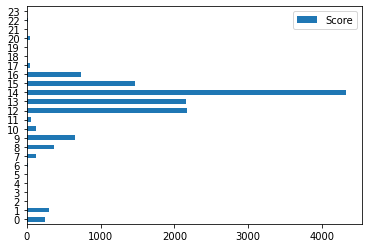

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 68.35463377252614
Test Prediction  68.35036255767963


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  83.58666666666666


In [0]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  34.89666666666666


In [0]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  35.839999999999996


In [0]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  59.650000000000006


In [0]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  52.17333333333334


In [0]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  51.61


In [0]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  92.66333333333333


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
9,current_hop,5.116146
18,cache_coherence_flit_index,2.456507
0,outport,2.453897
11,enqueue_time,1.901035
1,inport,1.539845
15,packet_count_index,1.113260
16,packet_max_index,0.894906
8,hop_count,0.514601
21,cache_coherence_vnet_index,0.311046
23,vnet_vc_cc_index,0.311046


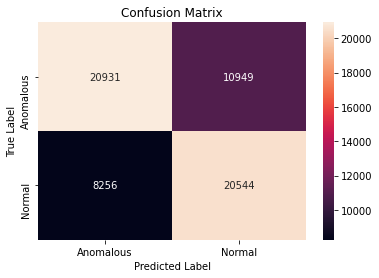

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69     31880
           1       0.65      0.71      0.68     28800

    accuracy                           0.68     60680
   macro avg       0.68      0.68      0.68     60680
weighted avg       0.69      0.68      0.68     60680



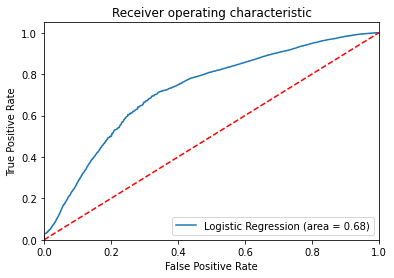

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

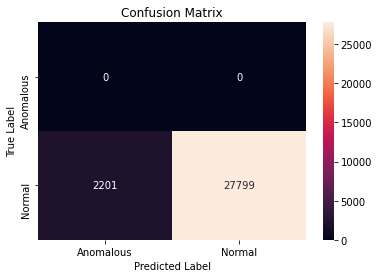

In [0]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.93      0.96     30000

    accuracy                           0.93     30000
   macro avg       0.50      0.46      0.48     30000
weighted avg       1.00      0.93      0.96     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 86.29850278924513
Test Prediction  79.40837178642056


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  81.07


In [0]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  52.88


In [0]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  56.19333333333333


In [0]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  47.449999999999996


In [0]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  52.86666666666666


In [0]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  49.71333333333333


In [0]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  70.54333333333334


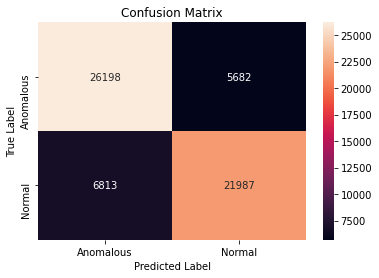

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81     31880
           1       0.79      0.76      0.78     28800

    accuracy                           0.79     60680
   macro avg       0.79      0.79      0.79     60680
weighted avg       0.79      0.79      0.79     60680



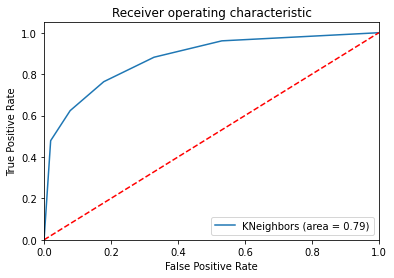

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

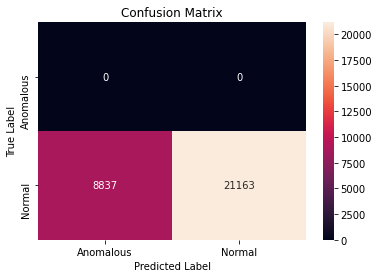

In [0]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.71      0.83     30000

    accuracy                           0.71     30000
   macro avg       0.50      0.35      0.41     30000
weighted avg       1.00      0.71      0.83     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 58.01259074316697
Test Prediction Score 58.19215557020435


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 69.26666666666667


In [0]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  33.236666666666665


In [0]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  34.37


In [0]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  30.173333333333336


In [0]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  33.876666666666665


In [0]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  33.56


In [0]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  92.39333333333335


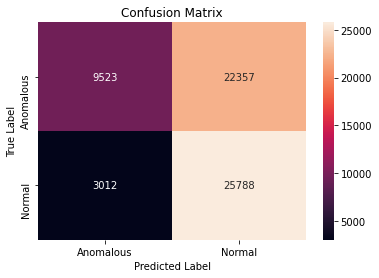

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.76      0.30      0.43     31880
           1       0.54      0.90      0.67     28800

    accuracy                           0.58     60680
   macro avg       0.65      0.60      0.55     60680
weighted avg       0.65      0.58      0.54     60680



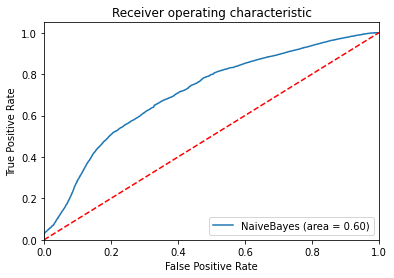

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 194174 samples, validate on 48544 samples
Epoch 1/10
194174/194174 [==============================] - 8s 39us/step - loss: 0.2258 - accuracy: 0.6323 - val_loss: 0.2194 - val_accuracy: 0.6601
Epoch 2/10
194174/194174 [==============================] - 7s 38us/step - loss: 0.2158 - accuracy: 0.6705 - val_loss: 0.2143 - val_accuracy: 0.6729
Epoch 3/10
194174/194174 [==============================] - 7s 38us/step - loss: 0.2111 - accuracy: 0.6815 - val_loss: 0.2110 - val_accuracy: 0.6765
Epoch 4/10
194174/194174 [==============================] - 7s 38us/step - loss: 0.2094 - accuracy: 0.6873 - val_loss: 0.2101 - val_accuracy: 0.6802
Epoch 5/10
194174/194174 [==============================] - 7s 37us/step - loss: 0.2087 - accuracy: 0.6888 - val_loss: 0.2092 - val_accuracy: 0.6909
Epoch 6/10
194174/194174 [==============================] - 7s 37us/step - loss: 0.2084 - accuracy: 0.6893 - val_loss: 0.2088 - val_accuracy: 0.6918
Epoch 7/10
194174/194174 [=============================

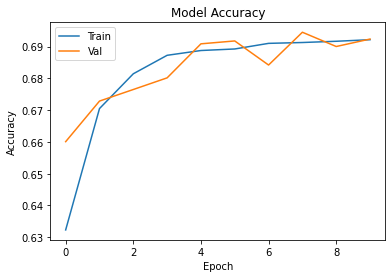

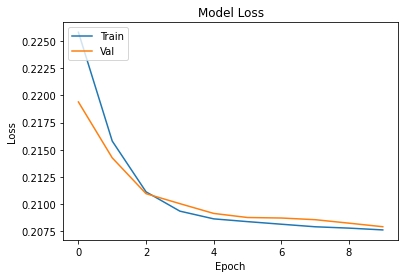

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 69.25%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 75.23%


In [0]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 34.23%


In [0]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 37.11%


In [0]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 64.97%


In [0]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 57.86%


In [0]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 57.82%


In [0]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 89.79%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 194174 samples, validate on 48544 samples
Epoch 1/30
194174/194174 [==============================] - 7s 37us/step - loss: 0.2488 - accuracy: 0.5350 - val_loss: 0.2480 - val_accuracy: 0.5416
Epoch 2/30
194174/194174 [==============================] - 7s 37us/step - loss: 0.2478 - accuracy: 0.5424 - val_loss: 0.2462 - val_accuracy: 0.5570
Epoch 3/30
194174/194174 [==============================] - 7s 38us/step - loss: 0.2359 - accuracy: 0.6020 - val_loss: 0.2287 - val_accuracy: 0.6205
Epoch 4/30
194174/194174 [==============================] - 7s 38us/step - loss: 0.2237 - accuracy: 0.6373 - val_loss: 0.2209 - val_accuracy: 0.6575
Epoch 5/30
194174/194174 [==============================] - 7s 38us/step - loss: 0.2179 - accuracy: 0.6596 - val_loss: 0.2174 - val_accuracy: 0.6588
Epoch 6/30
194174/194174 [==============================] - 8s 40us/step - loss: 0.2145 - accuracy: 0.6702 - val_loss: 0.2143 - val_accuracy: 0.6748
Epoch 7/30
194174/194174 [=============================

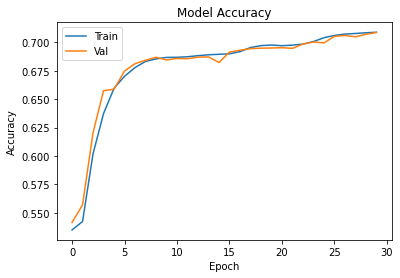

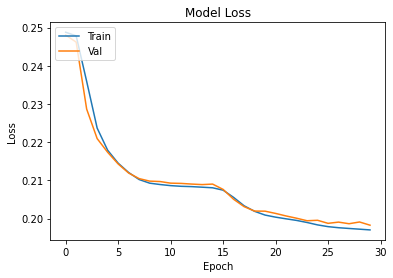

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 71.15%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 89.65%
accuracy: 63.49%
accuracy: 64.94%
accuracy: 67.78%
accuracy: 66.33%
accuracy: 66.69%
accuracy: 81.92%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 194174 samples, validate on 48544 samples
Epoch 1/30
194174/194174 [==============================] - 8s 44us/step - loss: 0.2496 - accuracy: 0.5251 - val_loss: 0.2490 - val_accuracy: 0.5276
Epoch 2/30
194174/194174 [==============================] - 8s 39us/step - loss: 0.2483 - accuracy: 0.5294 - val_loss: 0.2475 - val_accuracy: 0.5277
Epoch 3/30
194174/194174 [==============================] - 7s 38us/step - loss: 0.2444 - accuracy: 0.5701 - val_loss: 0.2390 - val_accuracy: 0.6042
Epoch 4/30
194174/194174 [==============================] - 8s 39us/step - loss: 0.2282 - accuracy: 0.6404 - val_loss: 0.2217 - val_accuracy: 0.6544
Epoch 5/30
194174/194174 [==============================] - 7s 39us/step - loss: 0.2170 - accuracy: 0.6706 - val_loss: 0.2155 - val_accuracy: 0.6769
Epoch 6/30
194174/194174 [==============================] - 7s 38us/step - loss: 0.2129 - accuracy: 0.6807 - val_loss: 0.2136 - val_accuracy: 0.6760
Epoch 7/30
194174/194174 [=============================

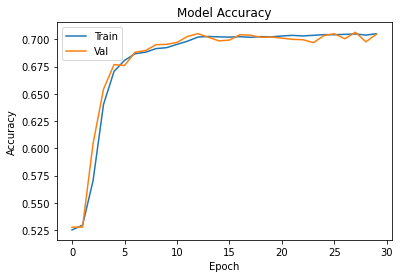

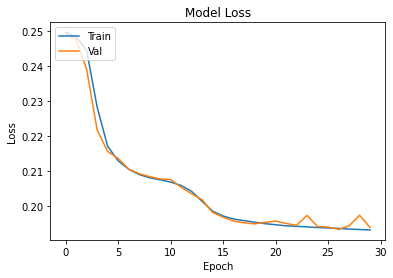

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 70.70%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 94.67%
accuracy: 49.08%
accuracy: 51.71%
accuracy: 72.41%
accuracy: 64.91%
accuracy: 65.09%
accuracy: 84.75%


5-Layer Neural Network Optimized

In [0]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 194174 samples, validate on 48544 samples
Epoch 1/100
194174/194174 [==============================] - 15s 76us/step - loss: 0.2028 - accuracy: 0.6882 - val_loss: 0.1941 - val_accuracy: 0.7145
Epoch 2/100
194174/194174 [==============================] - 14s 71us/step - loss: 0.1921 - accuracy: 0.7105 - val_loss: 0.1922 - val_accuracy: 0.6986
Epoch 3/100
194174/194174 [==============================] - 14s 71us/step - loss: 0.1873 - accuracy: 0.7184 - val_loss: 0.1766 - val_accuracy: 0.7309
Epoch 4/100
194174/194174 [==============================] - 14s 71us/step - loss: 0.1838 - accuracy: 0.7234 - val_loss: 0.1889 - val_accuracy: 0.7130
Epoch 5/100
194174/194174 [==============================] - 14s 74us/step - loss: 0.1811 - accuracy: 0.7273 - val_loss: 0.1736 - val_accuracy: 0.7412
Epoch 6/100
194174/194174 [==============================] - 14s 74us/step - loss: 0.1782 - accuracy: 0.7322 - val_loss: 0.1709 - val_accuracy: 0.7410
Epoch 7/100
194174/194174 [================

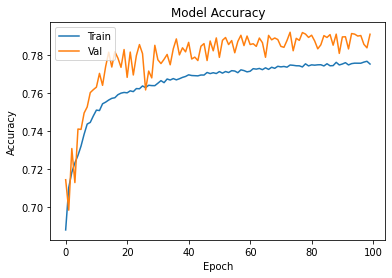

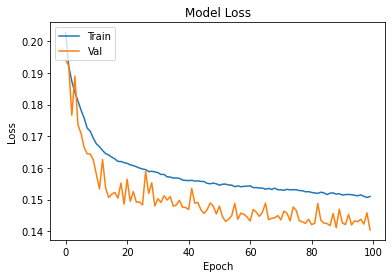

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 79.42%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 62.49%
accuracy: 51.22%
accuracy: 53.32%
accuracy: 44.34%
accuracy: 45.66%
accuracy: 43.94%
accuracy: 78.53%


In [0]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 194174 samples, validate on 48544 samples
Epoch 1/50
194174/194174 [==============================] - 15s 76us/step - loss: 0.2050 - accuracy: 0.6832 - val_loss: 0.1940 - val_accuracy: 0.7054
Epoch 2/50
194174/194174 [==============================] - 14s 73us/step - loss: 0.1936 - accuracy: 0.7075 - val_loss: 0.1843 - val_accuracy: 0.7227
Epoch 3/50
194174/194174 [==============================] - 14s 75us/step - loss: 0.1899 - accuracy: 0.7146 - val_loss: 0.1827 - val_accuracy: 0.7289
Epoch 4/50
194174/194174 [==============================] - 15s 75us/step - loss: 0.1865 - accuracy: 0.7201 - val_loss: 0.1751 - val_accuracy: 0.7338
Epoch 5/50
194174/194174 [==============================] - 14s 73us/step - loss: 0.1831 - accuracy: 0.7267 - val_loss: 0.1778 - val_accuracy: 0.7329
Epoch 6/50
194174/194174 [==============================] - 14s 73us/step - loss: 0.1800 - accuracy: 0.7303 - val_loss: 0.1678 - val_accuracy: 0.7498
Epoch 7/50
194174/194174 [=======================

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 78.60%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 62.88%
accuracy: 47.61%
accuracy: 49.27%
accuracy: 44.25%
accuracy: 43.47%
accuracy: 42.23%
accuracy: 73.45%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 95.76257220313286
Test Prediction Score 90.44495715227423


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 63.953333333333326
Test Prediction Score 41.71666666666667
Test Prediction Score 44.11333333333333
Test Prediction Score 45.20666666666667
Test Prediction Score 46.63333333333333
Test Prediction Score 44.31333333333333
Test Prediction Score 58.97


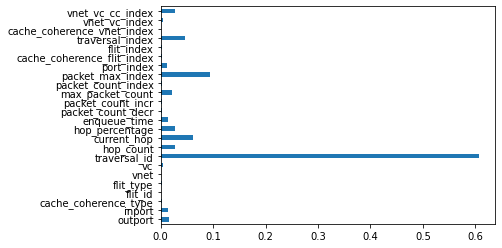

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

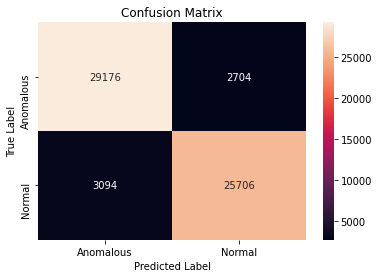

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     31880
           1       0.90      0.89      0.90     28800

    accuracy                           0.90     60680
   macro avg       0.90      0.90      0.90     60680
weighted avg       0.90      0.90      0.90     60680



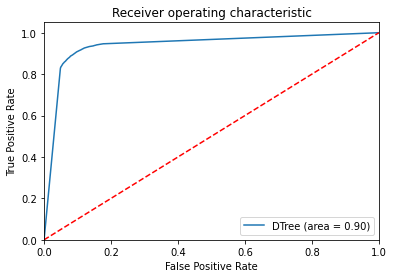

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [0]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 98.2263367364596
Test Prediction Score 92.0435069215557


In [0]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 62.370000000000005
Test Prediction Score 40.10666666666667
Test Prediction Score 42.193333333333335
Test Prediction Score 45.236666666666665
Test Prediction Score 46.88666666666666
Test Prediction Score 45.13666666666667
Test Prediction Score 60.45666666666667


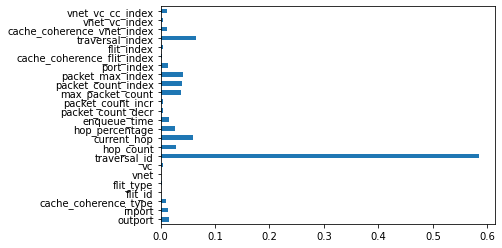

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

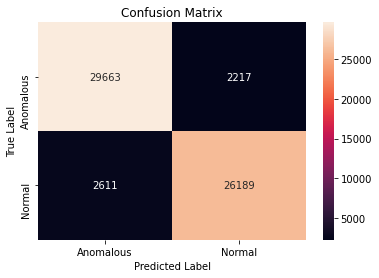

In [0]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     31880
           1       0.92      0.91      0.92     28800

    accuracy                           0.92     60680
   macro avg       0.92      0.92      0.92     60680
weighted avg       0.92      0.92      0.92     60680



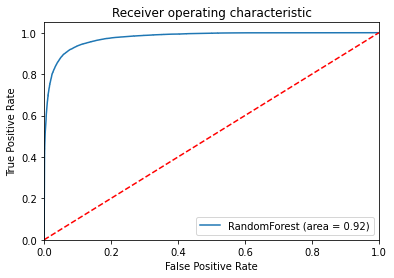

In [0]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [0]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 98.80396179928971
Test Prediction Score 94.08371786420567


In [0]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 62.47666666666667
Test Prediction Score 41.06333333333333
Test Prediction Score 43.04
Test Prediction Score 44.55
Test Prediction Score 55.620000000000005
Test Prediction Score 54.02666666666667
Test Prediction Score 48.693333333333335


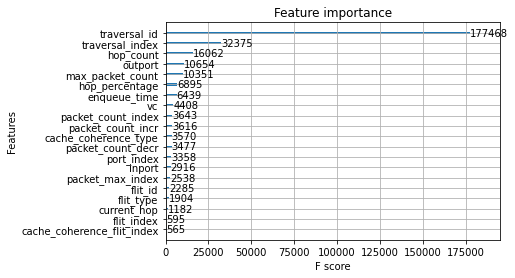

In [0]:
plot_importance(xgbc)
plt.show()

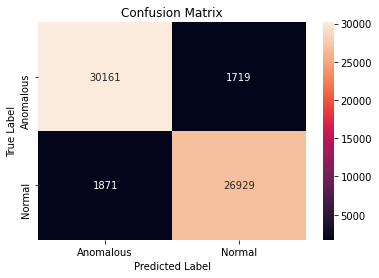

In [0]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     31880
           1       0.94      0.94      0.94     28800

    accuracy                           0.94     60680
   macro avg       0.94      0.94      0.94     60680
weighted avg       0.94      0.94      0.94     60680



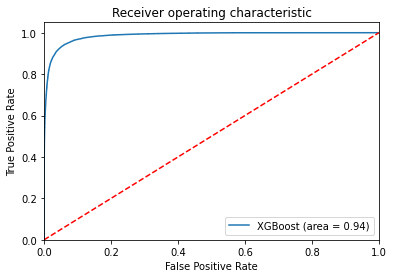

In [0]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [0]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 84.93684028378613
Test Prediction Score 84.18424522083059


In [0]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 67.08333333333333
Test Prediction Score 43.65
Test Prediction Score 46.339999999999996
Test Prediction Score 45.050000000000004
Test Prediction Score 45.879999999999995
Test Prediction Score 44.60666666666667
Test Prediction Score 40.46666666666667


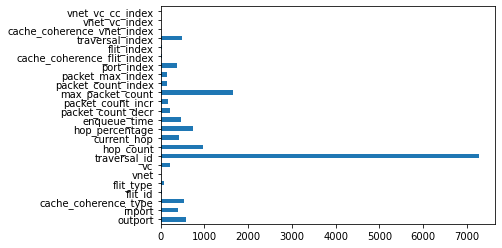

In [0]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

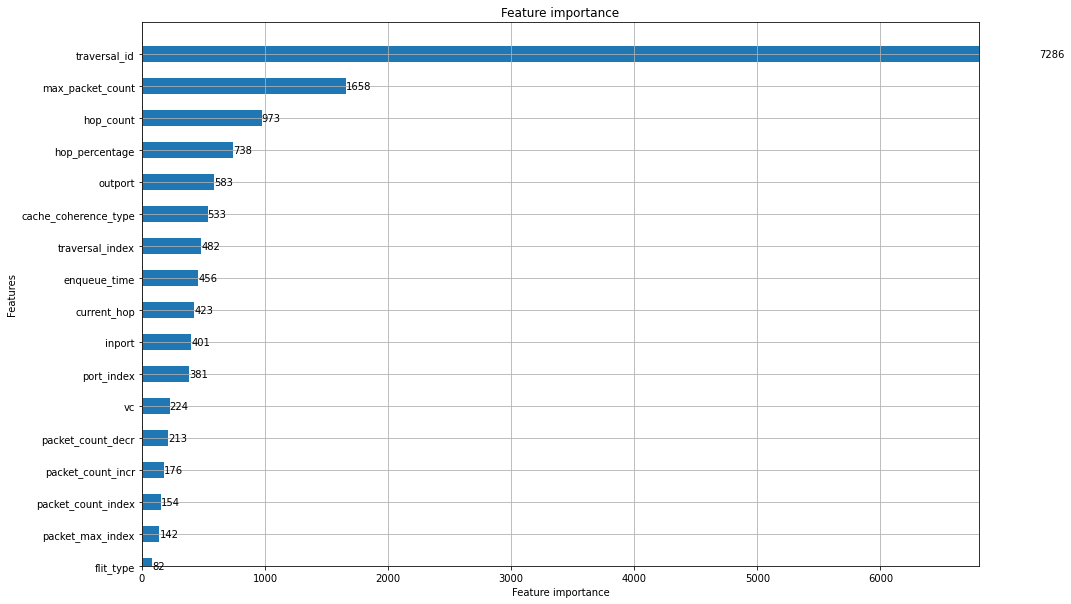

In [0]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [0]:
sorted(gbm.feature_importances_,reverse=True)

[7286,
 1658,
 973,
 738,
 583,
 533,
 482,
 456,
 423,
 401,
 381,
 224,
 213,
 176,
 154,
 142,
 82,
 34,
 32,
 29,
 0,
 0,
 0,
 0]

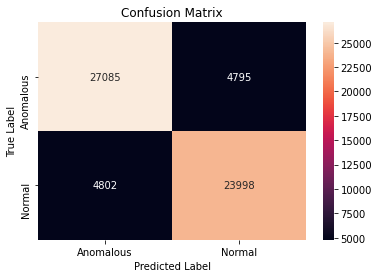

In [0]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     31880
           1       0.83      0.83      0.83     28800

    accuracy                           0.84     60680
   macro avg       0.84      0.84      0.84     60680
weighted avg       0.84      0.84      0.84     60680



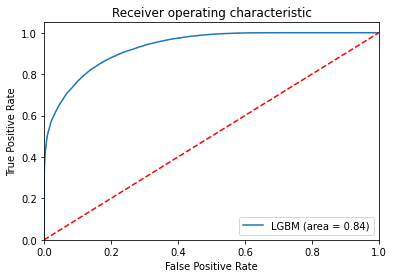

In [0]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()